In [48]:
# Downloads the KITTI dataset and DAVIS dataset to the datasets/{dataset_name}/raw directory

import os
import requests
import zipfile
from tqdm.auto import tqdm
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
from cv2 import imread

In [2]:
KITTI_DOWNLOAD_URL = 'https://github.com/ultralytics/assets/releases/download/v0.0.0/kitti.zip'
DAVIS_DOWNLOAD_URL = 'https://data.vision.ee.ethz.ch/csergi/share/davis/DAVIS-2017-trainval-480p.zip'

In [9]:
def download_and_extract(url, dataset_name, path=Path('../datasets')):
    local_zip_path = path / dataset_name / f'{dataset_name}.zip'

    # Check if dataset already exists
    if local_zip_path.exists():
        print(f'{dataset_name} dataset already downloaded.')
        return
    
    # Download the dataset
    response = requests.get(url, stream=True)
    total_size = int(response.headers.get('content-length', 0))
    with open(local_zip_path, 'wb') as file, tqdm(desc=f'Downloading {dataset_name}', total=total_size, unit='iB', unit_scale=True) as bar:
        for data in response.iter_content(chunk_size=1024):
            size = file.write(data)
            bar.update(size)

    # Extract the dataset
    with zipfile.ZipFile(local_zip_path, 'r') as zip_ref:
        zip_ref.extractall(path / dataset_name)

    # Remove the zip file after extraction
    os.remove(local_zip_path)
    print(f'{dataset_name} dataset downloaded and extracted.')


In [10]:
# Check if directories exist
datasets_dir = Path('../datasets')
kitti_raw_dir = datasets_dir / 'kitti'
davis_raw_dir = datasets_dir / 'davis'

# Download and extract datasets if not already present
if not kitti_raw_dir.exists():
    kitti_raw_dir.mkdir(parents=True, exist_ok=True)
else:
    download_and_extract(KITTI_DOWNLOAD_URL, 'kitti')

if not davis_raw_dir.exists():
    davis_raw_dir.mkdir(parents=True, exist_ok=True)
else:
    download_and_extract(DAVIS_DOWNLOAD_URL, 'davis')

kitti dataset downloaded and extracted.


davis dataset downloaded and extracted.


In [49]:
# Preview images from each dataset
def preview_kitti_images(dataset_path, num_images=3):
    image_dir = dataset_path / 'images' / 'train'
    image_files = list(image_dir.glob('*.png'))

    if not image_files:
        print(f'No images found in {image_dir}')
        return
    
    for img_file in image_files[:num_images]:
        img = imread(img_file)
        plt.imshow(img[..., ::-1])
        plt.title(str(img_file))
        plt.show()

def preview_davis_images(dataset_path, num_images=3):
    image_dir = dataset_path / 'JPEGImages' / '480p'
    subdirs = list(image_dir.iterdir())

    if not subdirs:
        print(f'No subdirectories found in {image_dir}')
        return

    for i in range(min(num_images, len(subdirs))):
        img_files = list(subdirs[i].glob('*.jpg'))
        img = imread(str(img_files[0]))
        plt.imshow(img[..., ::-1])
        plt.title(str(img_files[0]))
        plt.show()

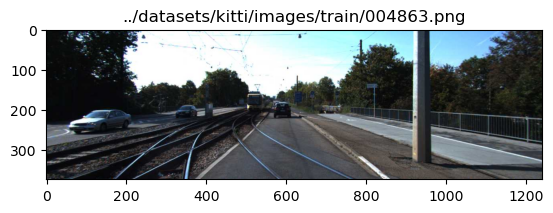

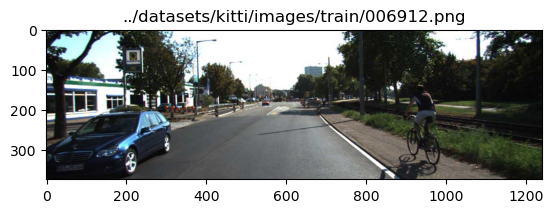

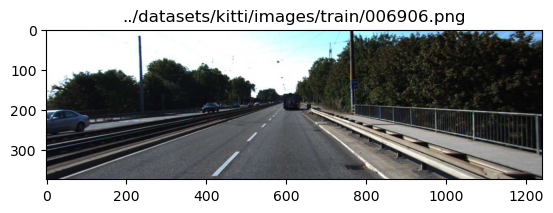

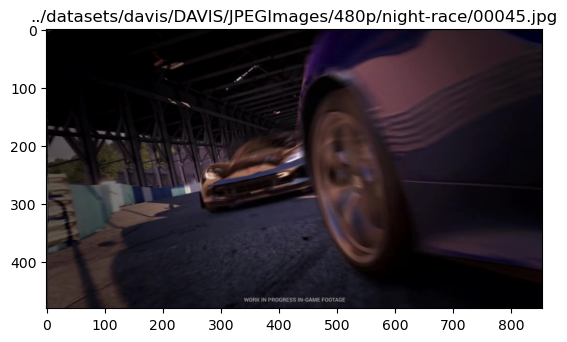

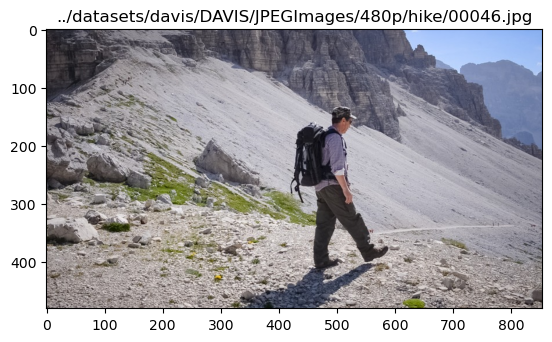

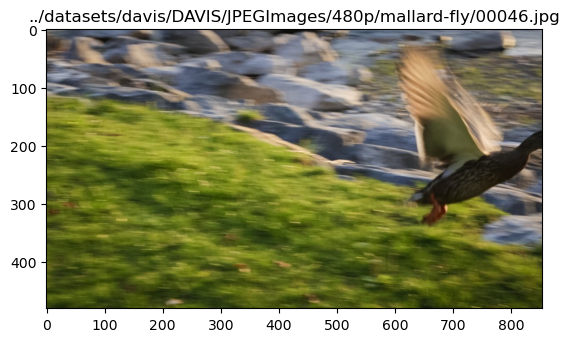

In [50]:
# Updated davis dataset path after extraction
kitti_raw_dir = datasets_dir / 'kitti'
davis_raw_dir = datasets_dir / 'davis' / 'DAVIS'

preview_kitti_images(kitti_raw_dir)
preview_davis_images(davis_raw_dir)